# Finding optimal number of clusters

## Steps Involved:
                   1. Importing the necessary Libraries.
                   2. Importing the dataset.
                   3. Combining Various features to make the dataset simpler.
                   4. Taking necessary features required for clustering.
                   5. Finding optimal number of clusters using elbow method.
                   6. Training the model by k-means clustering.
                   7. Analyse the clusters and classify them.

## Importing the necessary libraries

In [51]:
import numpy as np
#for handling arrays 
import pandas as pd
# for handling the csv files and rows in data set
import matplotlib.pyplot as plt
# for showing cluster plot and elbow method

## Importing Data Set
Using a regular csv file

In [52]:
dataset = pd.read_csv('Iris(1).csv')

In [53]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Simplifying the dataset 
We are assuming the sepal area is simply its length multiplied by its width, and saaving it in sepal area.

In [54]:
dataset['SepalArea'] = dataset['SepalLengthCm'] * dataset['SepalWidthCm']

In [55]:
#new column added
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalArea
0,1,5.1,3.5,1.4,0.2,Iris-setosa,17.85
1,2,4.9,3.0,1.4,0.2,Iris-setosa,14.70
2,3,4.7,3.2,1.3,0.2,Iris-setosa,15.04
3,4,4.6,3.1,1.5,0.2,Iris-setosa,14.26
4,5,5.0,3.6,1.4,0.2,Iris-setosa,18.00
5,6,5.4,3.9,1.7,0.4,Iris-setosa,21.06
6,7,4.6,3.4,1.4,0.3,Iris-setosa,15.64
7,8,5.0,3.4,1.5,0.2,Iris-setosa,17.00
8,9,4.4,2.9,1.4,0.2,Iris-setosa,12.76
9,10,4.9,3.1,1.5,0.1,Iris-setosa,15.19


In [56]:
#dropping petal length and width columns
dataset = dataset.drop('SepalLengthCm',axis=1)
dataset = dataset.drop('SepalWidthCm',axis=1)

In [57]:
dataset.head(10)

,Id,PetalLengthCm,PetalWidthCm,Species,SepalArea
0,1,1.4,0.2,Iris-setosa,17.85
1,2,1.4,0.2,Iris-setosa,14.70
2,3,1.3,0.2,Iris-setosa,15.04
3,4,1.5,0.2,Iris-setosa,14.26
4,5,1.4,0.2,Iris-setosa,18.00
5,6,1.7,0.4,Iris-setosa,21.06
6,7,1.4,0.3,Iris-setosa,15.64
7,8,1.5,0.2,Iris-setosa,17.00
8,9,1.4,0.2,Iris-setosa,12.76
9,10,1.5,0.1,Iris-setosa,15.19


In [58]:
dataset = dataset.drop('Id',axis=1)

In [59]:
dataset.head(10)

,PetalLengthCm,PetalWidthCm,Species,SepalArea
0,1.4,0.2,Iris-setosa,17.85
1,1.4,0.2,Iris-setosa,14.70
2,1.3,0.2,Iris-setosa,15.04
3,1.5,0.2,Iris-setosa,14.26
4,1.4,0.2,Iris-setosa,18.00
5,1.7,0.4,Iris-setosa,21.06
6,1.4,0.3,Iris-setosa,15.64
7,1.5,0.2,Iris-setosa,17.00
8,1.4,0.2,Iris-setosa,12.76
9,1.5,0.1,Iris-setosa,15.19


We are assuming the petal area is simply its length multiplied by its width, and saaving it in sepal area.

In [60]:
dataset['PetalArea'] = dataset['PetalLengthCm'] * dataset['PetalWidthCm']

In [61]:
# new column PetalArea
dataset.head(10)

,PetalLengthCm,PetalWidthCm,Species,SepalArea,PetalArea
0,1.4,0.2,Iris-setosa,17.85,0.28
1,1.4,0.2,Iris-setosa,14.70,0.28
2,1.3,0.2,Iris-setosa,15.04,0.26
3,1.5,0.2,Iris-setosa,14.26,0.30
4,1.4,0.2,Iris-setosa,18.00,0.28
5,1.7,0.4,Iris-setosa,21.06,0.68
6,1.4,0.3,Iris-setosa,15.64,0.42
7,1.5,0.2,Iris-setosa,17.00,0.30
8,1.4,0.2,Iris-setosa,12.76,0.28
9,1.5,0.1,Iris-setosa,15.19,0.15


In [62]:
#dropping petal length and width columns
dataset = dataset.drop('PetalLengthCm',axis=1)
dataset = dataset.drop('PetalWidthCm',axis=1)

In [63]:
# now, we have only 3 columns lef
dataset.head(10)

,Species,SepalArea,PetalArea
0,Iris-setosa,17.85,0.28
1,Iris-setosa,14.70,0.28
2,Iris-setosa,15.04,0.26
3,Iris-setosa,14.26,0.30
4,Iris-setosa,18.00,0.28
5,Iris-setosa,21.06,0.68
6,Iris-setosa,15.64,0.42
7,Iris-setosa,17.00,0.30
8,Iris-setosa,12.76,0.28
9,Iris-setosa,15.19,0.15


## Taking necessary features required for clustering.
Making an array with variables we require that is SepalArea and PetalArea.

In [64]:
#loading data into numpy array x using iloc function.
X = dataset.iloc[:, [1,2]].values

In [65]:
X

array([[17.85,  0.28],
       [14.7 ,  0.28],
       [15.04,  0.26],
       [14.26,  0.3 ],
       [18.  ,  0.28],
       [21.06,  0.68],
       [15.64,  0.42],
       [17.  ,  0.3 ],
       [12.76,  0.28],
       [15.19,  0.15],
       [19.98,  0.3 ],
       [16.32,  0.32],
       [14.4 ,  0.14],
       [12.9 ,  0.11],
       [23.2 ,  0.24],
       [25.08,  0.6 ],
       [21.06,  0.52],
       [17.85,  0.42],
       [21.66,  0.51],
       [19.38,  0.45],
       [18.36,  0.34],
       [18.87,  0.6 ],
       [16.56,  0.2 ],
       [16.83,  0.85],
       [16.32,  0.38],
       [15.  ,  0.32],
       [17.  ,  0.64],
       [18.2 ,  0.3 ],
       [17.68,  0.28],
       [15.04,  0.32],
       [14.88,  0.32],
       [18.36,  0.6 ],
       [21.32,  0.15],
       [23.1 ,  0.28],
       [15.19,  0.15],
       [16.  ,  0.24],
       [19.25,  0.26],
       [15.19,  0.15],
       [13.2 ,  0.26],
       [17.34,  0.3 ],
       [17.5 ,  0.39],
       [10.35,  0.39],
       [14.08,  0.26],
       [17.

## Finding optimal number of clusters

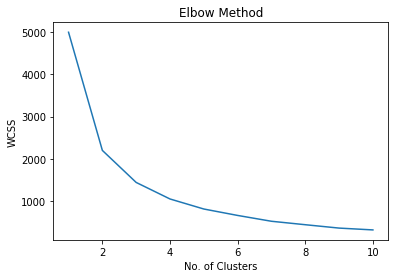

In [66]:
from sklearn.cluster import KMeans
wcss = []
# wcss is within clusters sum of squares. It is the sum of total distances from the potential centroid to the clusters.
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state = 42)
    #k-means++ is used to avoid randomization trap, to get optimal number of clusters.
    kmeans.fit(X)
    #training the model
    wcss.append(kmeans.inertia_)
    #adding the sum of squares

#making the plot
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()
#optimal number of clusters is 3

In [67]:
# Making predictions and storing them in y.
kmeans = KMeans(n_clusters=3, init = 'k-means++',random_state = 42)
y_kmeans=kmeans.fit_predict(X)

In [68]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

# Plotting the clustering data
Since the optimal number of clusters is 3, the only options are 0,1 and 2 and thus we plot them.

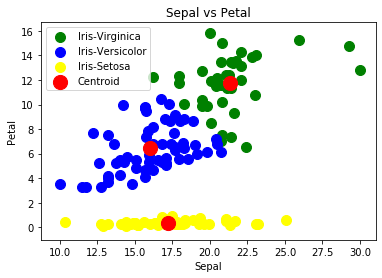

In [69]:
# Use the description data to classify the clusters.
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='green',label=('Iris-Virginica'))
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label=('Iris-Versicolor'))
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='yellow',label=('Iris-Setosa'))
#PLotting the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroid')
plt.title('Sepal vs Petal')
plt.xlabel('Sepal')
plt.ylabel('Petal')
plt.legend()
plt.show()

## Comparing the mean to the clusters we have.

In [131]:
set(dataset.Species)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [26]:

dataset[dataset.Species=='Iris-setosa'].describe()

,SepalArea,PetalArea
count,50.000000,50.000000
mean,17.208800,0.362800
std,2.947688,0.183248
min,10.350000,0.110000
25%,15.040000,0.265000
50%,17.000000,0.300000
75%,19.155000,0.420000
max,25.080000,0.960000


In [27]:
dataset[dataset.Species=='Iris-versicolor'].describe()

,SepalArea,PetalArea
count,50.000000,50.000000
mean,16.526200,5.720400
std,2.866882,1.368403
min,10.000000,3.300000
25%,14.347500,4.860000
50%,16.385000,5.615000
75%,18.495000,6.750000
max,22.400000,8.640000


In [28]:
dataset[dataset.Species=='Iris-virginica'].describe()

,SepalArea,PetalArea
count,50.000000,50.000000
mean,19.684600,11.296200
std,3.458783,2.157412
min,12.250000,7.500000
25%,17.430000,9.717500
50%,20.060000,11.445000
75%,21.412500,12.790000
max,30.020000,15.870000


# Summary
We know the unsupervised model is correct because there are 3 types of flowers in the dataset and we got optimal number of clusters as 3.